# 📊 <span style='color:green'> <b>Data Description </b></span>


#  Heart Disease Dataset

| Variabel          | Deskripsi                                                                                         |
|-------------------|---------------------------------------------------------------------------------------------------|
| Age               | Usia pasien dalam tahun                                                                            |
| Sex               | Jenis kelamin pasien, dengan opsi F untuk perempuan (Female) dan M untuk laki-laki (Male)          |
| ChestPainType     | Jenis nyeri dada yang dialami oleh pasien, dengan opsi ATA untuk nyeri seperti terjepit (Aching), NAP untuk nyeri tidak berkaitan dengan jantung (Not Heart-related), dan ASY untuk asimtomatik (Asymptomatic) |
| RestingBP         | Tekanan darah istirahat pasien dalam mm Hg (milimeter raksa)                                       |
| Cholesterol       | Kolesterol pasien dalam mg/dl (miligram per desiliter)                                             |
| FastingBS         | Tingkat gula darah puasa pasien dalam mg/dl (miligram per desiliter), dengan 0 untuk tidak ada dan 1 untuk ada |
| RestingECG        | Hasil elektrokardiogram (EKG) istirahat pasien, dengan 0 untuk normal, 1 untuk kelainan pada gelombang ST-T, dan 2 untuk hipertrofi ventrikel kiri |
| MaxHR             | Denyut jantung maksimum yang dicapai oleh pasien dalam bpm (denyut per menit)                      |
| ExerciseAngina    | Kehadiran angina yang dipicu oleh olahraga pada pasien, dengan 0 untuk tidak ada dan 1 untuk ada   |
| Oldpeak           | Depresi segmen ST yang diinduksi oleh olahraga relatif terhadap istirahat                          |
| ST_Slope          | Kemiringan segmen ST selama olahraga, dengan opsi Up untuk meningkat, Flat untuk datar, dan Down untuk menurun |
| HeartDisease      | Kehadiran penyakit jantung pada pasien, dengan 0 untuk tidak ada dan 1 untuk ada                   |



# 📚 <span style='color:darkblue'>Import Libraries</span>

In [638]:
import pandas as pd
import pickle
#for visualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# ⚠️ <span style='color:orange'>Remove Warning</span>

In [639]:
import warnings
warnings.filterwarnings('ignore')

# 📂 <span style='color:purple'>Load Data</span>

In [640]:
# read our data
data=pd.read_csv('heart.csv')

In [641]:
# display all columns and rows
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)

# 🔍 <span style='color:teal'><b>Data Exploration</b></span>

In [642]:
# show first 5 rows
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [643]:
missing_values = data.isnull().sum()
print("Jumlah nilai yang hilang untuk setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang untuk setiap kolom:
Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64


In [644]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [645]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


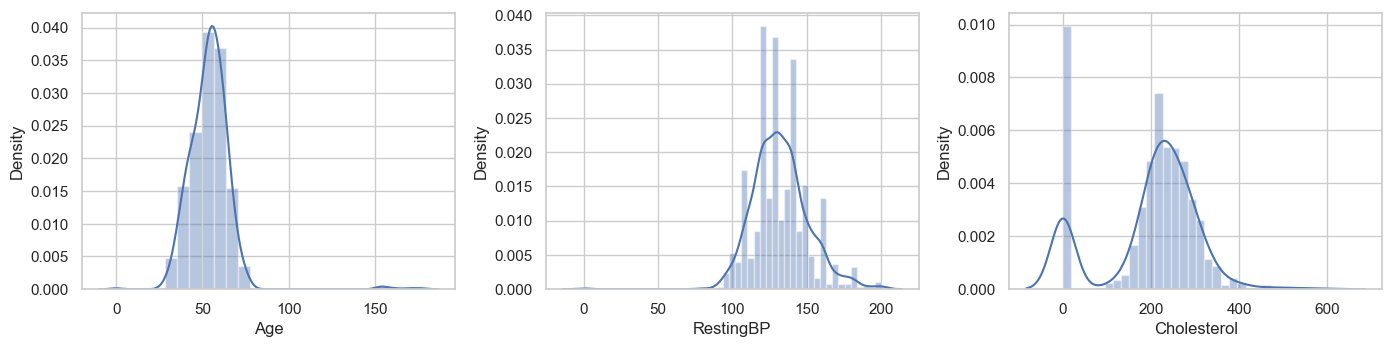

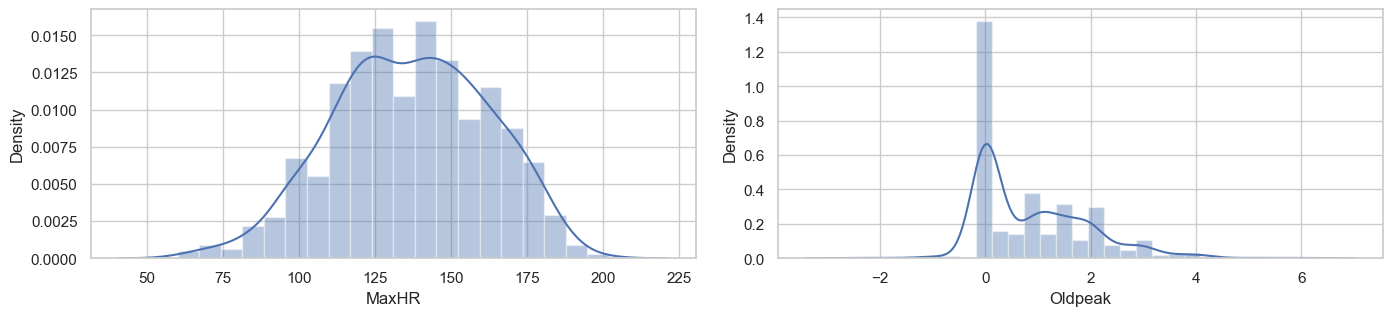

In [646]:
plt.figure(1,figsize=(14,10))

## Age

plt.subplot(331)
sns.distplot(data.Age, bins = 25)

## Blood Pressure in mm Hg

plt.subplot(332)
sns.distplot(data.RestingBP)

## Cholesterol in mm/dl

plt.subplot(333)
sns.distplot(data.Cholesterol)


plt.tight_layout()
plt.show()

plt.figure(2,figsize=(14,6))

## MaxHR - Heart Rate can be between 60 - 202

plt.subplot(221)
sns.distplot(data.MaxHR)

## OldPeak  Numerical value in depression

plt.subplot(222)
sns.distplot(data.Oldpeak)

plt.tight_layout()
plt.show()

Terdapat puncak dekat '0' untuk Tingkat Kolesterol yang diukur dalam mm/dl. Oleh karena itu, kita akan menggantinya dengan nilai rata-rata daripada nilai maksimum atau minimum (selain dari 0) agar distribusi keseluruhan tidak terpengaruh.

In [647]:
## finding no. of cholesterol values which are marked as 0

zero_Cholesterol = len(data[data.Cholesterol == 0])
print("No. of rows having Cholesterol value as 0:", zero_Cholesterol)

No. of rows having Cholesterol value as 0: 172


In [648]:
median = data[data['Cholesterol'] != 0]['Cholesterol'].median()
print(median)

237.0


In [649]:
## replacing 0 values with avg
data.loc[data.Cholesterol == 0,"Cholesterol"] = median

## confirming 0 is replaced

zero_Cholesterol = len(data[data.Cholesterol == 0])
print("No. of rows having Cholesterol value as '0' after replacing '0s' with mean:", zero_Cholesterol)

No. of rows having Cholesterol value as '0' after replacing '0s' with mean: 0


In [650]:
## finding no. of cholesterol values which are marked as 0

zero_Cholesterol = len(data[data.Cholesterol == 0])
print("No. of rows having Cholesterol value as 0:", zero_Cholesterol)

No. of rows having Cholesterol value as 0: 0


In [651]:
data.shape

(918, 12)

In [652]:
data.isna().sum()

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

In [653]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,243.204793,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,53.401297,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [654]:
data.duplicated().sum()

0

In [655]:
# Menghitung median untuk kolom Age
median_age = data['Age'].median()

# Hitung modus untuk kolom SEX
modus_sex = data['Sex'].mode()[0]

# Isi nilai yang hilang dalam kolom SEX dengan modus
data['Age'].fillna(median_age, inplace=True)
data['Sex'].fillna(modus_sex, inplace=True)

In [656]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [657]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [658]:
if (data['ST_Slope'] == 'Down').any():
    print("Ada nilai 'Down' di kolom ST_Slope.")
else:
    print("Tidak ada nilai 'Down' di kolom ST_Slope.")

Ada nilai 'Down' di kolom ST_Slope.


In [659]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.101307,132.396514,243.204793,0.233115,136.809368,0.887364,0.553377
std,12.938727,18.514154,53.401297,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# 📊 <span style='color:green'><b>Visualisasi Data</b></span>

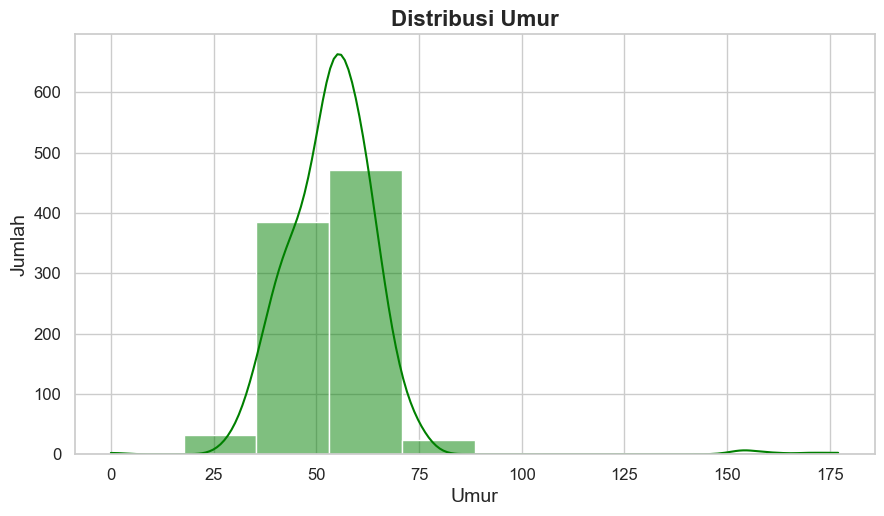

In [660]:
# Distribusi Umur
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True, color='green', palette= 'pastel')
plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)

# Menggunakan font yang bersih dan sederhana
plt.title('Distribusi Umur', fontsize=16, weight='bold')
plt.xlabel('Umur', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan plot
plt.show()

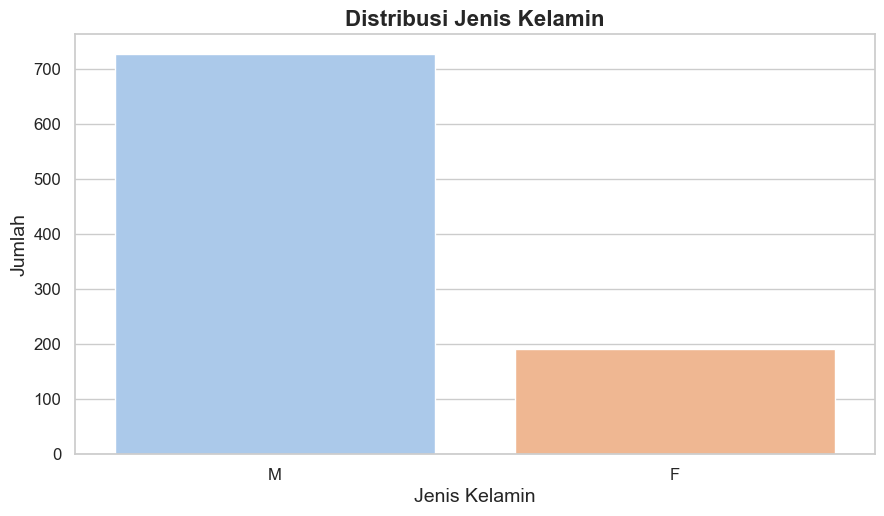

In [661]:
# Distribusi Jenis Kelamin
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sex', palette= 'pastel')

# Menambahkan margin yang cukup
plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)

# Menggunakan font yang bersih dan sederhana
plt.title('Distribusi Jenis Kelamin', fontsize=16, weight='bold')
plt.xlabel('Jenis Kelamin', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan plot
plt.show()

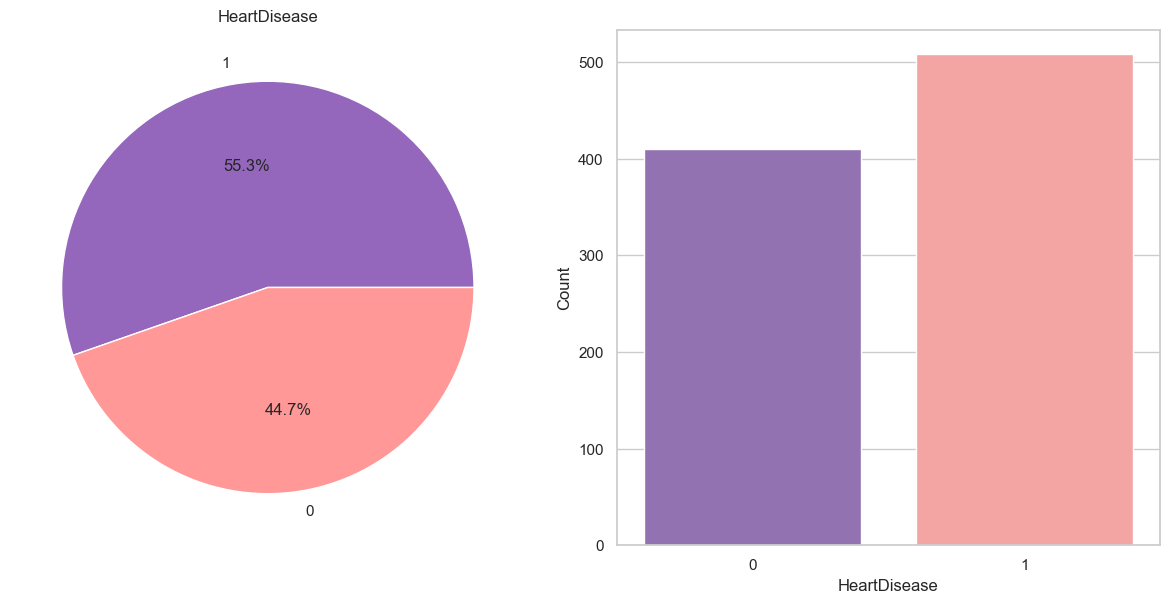

In [662]:
# Distribusi Penyakit Jantung

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plotting pie chart
data['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#9467bd', '#ff9896'], ax=axs[0])
axs[0].set_title('HeartDisease')
axs[0].set_ylabel('')

# Plotting count plot
sns.countplot(x='HeartDisease', data=data,palette=['#9467bd', '#ff9896'], ax=axs[1])
axs[1].set_xlabel('HeartDisease')
axs[1].set_ylabel('Count')

plt.tight_layout()  
plt.show()

54.6% of the population has heart disease.
45.4% of the population does not have heart disease.


In [663]:
# Setting buat plot box dan histogram

def plot_box_and_hist(data, column_name, palette="Set1"):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=data["HeartDisease"].map({0: "normal", 1: "heart disease"}), y=column_name, data=data, palette=palette)
    plt.title(f"Box Plot of {column_name} by heart disease")

    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=column_name, hue=data["HeartDisease"].map({0: "Normal", 1: "heart disease"}), palette=palette, kde=True)
    plt.title(f"Histogram of {column_name} by heart disease")

    plt.tight_layout()
    plt.show()

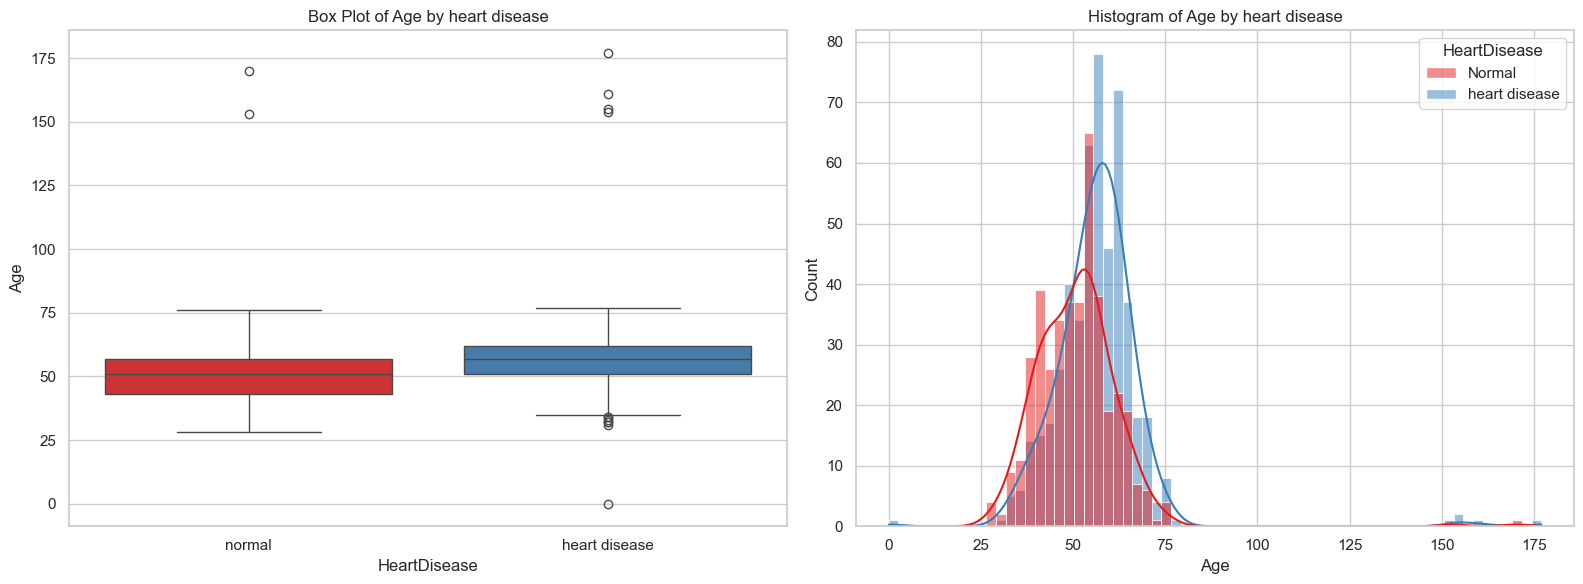

In [664]:
plot_box_and_hist(data,"Age")

Usia adalah faktor signifikan dalam prevalensi penyakit jantung, di mana individu yang lebih tua lebih cenderung memiliki penyakit jantung.

Bagi mereka yang memiliki penyakit jantung, usia median lebih tinggi dibandingkan dengan mereka yang tidak memiliki.

Meskipun penyakit jantung lebih umum terjadi pada kelompok usia yang lebih tua, itu juga mempengaruhi jumlah yang signifikan dari individu yang lebih muda.

In [665]:
lower_bound = 1  # Batas bawah umur yang wajar
upper_bound = 80  # Batas atas umur yang wajar

# Menghapus outlier dari DataFrame
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]
data.shape[0]

911

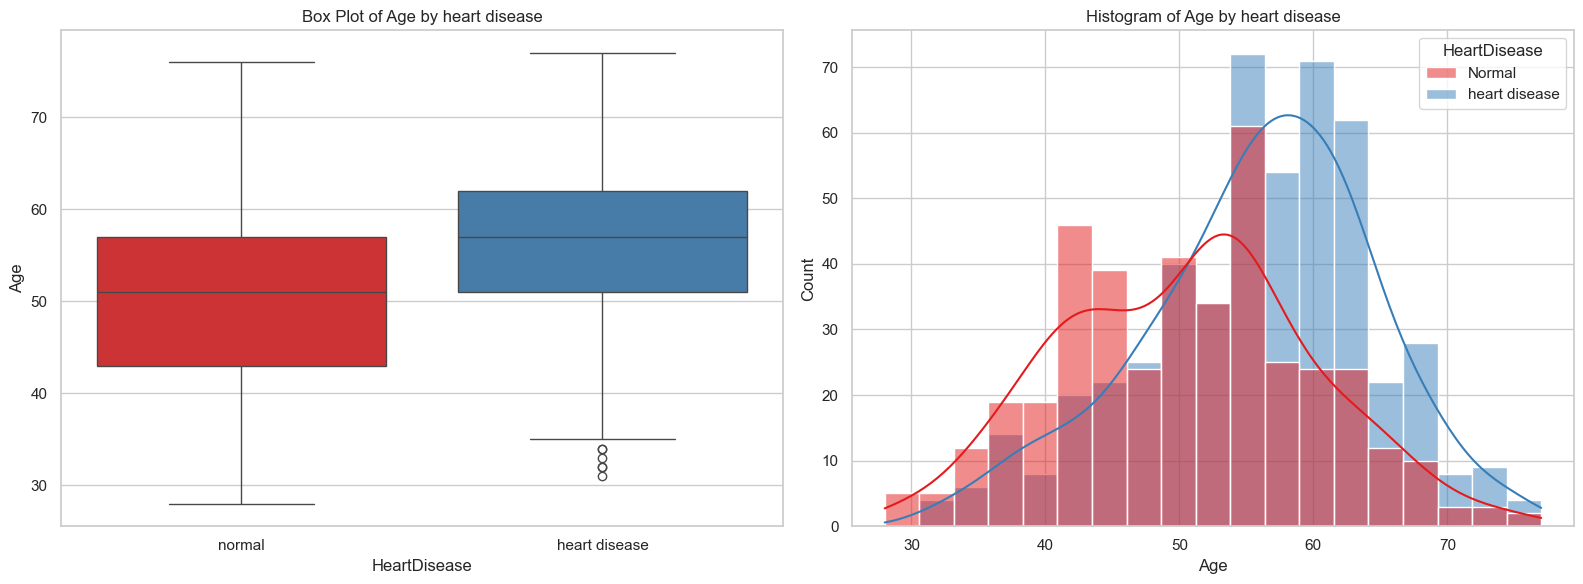

In [666]:
plot_box_and_hist(data,"Age")

In [667]:
# Menambahkan fitur tekanan darah tinggi
data['HighBloodPressure'] = (data['RestingBP'] > 140) | (data['Cholesterol'] > 90)

In [668]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HighBloodPressure
0,54.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,True
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,True
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0,True
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,True
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,True


# 📊 <span style='color:navy'><b>Summary</b></span>

- There are 918 entries.
- Age ranges from 28 to 77 years old.
- There is a significant positive skew in cholesterol with a mean of 198.8 and a median of 223, with a maximum value of 603.
- 55% of the patients have heart disease.
- There are no null values.
- There are no duplicates.

***let split our data***

In [669]:
# Mengubah kolom "HighBloodPressure" menjadi nilai numerik
data['HighBloodPressure'] = data['HighBloodPressure'].astype(int)

In [670]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan pelabelan data pada variabel target
y_encoded = label_encoder.fit_transform(data["HeartDisease"])

# Menampilkan beberapa baris pertama dari hasil pelabelan data
print(y_encoded[:5])


[0 1 0 1 0]


In [671]:
# Mengambil kolom dengan tipe data objek atau kategori
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [672]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap fitur kategori dalam DataFrame
for column in categorical_features:
    encoded_values = label_encoder.fit_transform(data[column])
    data[column] = encoded_values

# Menampilkan beberapa baris pertama dari DataFrame yang sudah di-label encoding
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HighBloodPressure
0,54.0,1,1,140,289,0,1,172,0,0.0,2,0,1
1,49.0,0,2,160,180,0,1,156,0,1.0,1,1,1
2,37.0,1,1,130,283,0,2,98,0,0.0,2,0,1
3,48.0,0,0,138,214,0,1,108,1,1.5,1,1,1
4,54.0,1,2,150,195,0,1,122,0,0.0,2,0,1


In [673]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 0 to 917
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                911 non-null    float64
 1   Sex                911 non-null    int64  
 2   ChestPainType      911 non-null    int64  
 3   RestingBP          911 non-null    int64  
 4   Cholesterol        911 non-null    int64  
 5   FastingBS          911 non-null    int64  
 6   RestingECG         911 non-null    int64  
 7   MaxHR              911 non-null    int64  
 8   ExerciseAngina     911 non-null    int64  
 9   Oldpeak            911 non-null    float64
 10  ST_Slope           911 non-null    int64  
 11  HeartDisease       911 non-null    int64  
 12  HighBloodPressure  911 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 99.6 KB


In [674]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(data)
data_minmax

array([[0.53061224, 1.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.42857143, 0.        , 0.66666667, ..., 0.5       , 1.        ,
        1.        ],
       [0.18367347, 1.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.        , ..., 0.5       , 1.        ,
        1.        ],
       [0.59183673, 0.        , 0.33333333, ..., 0.5       , 1.        ,
        1.        ],
       [0.20408163, 1.        , 0.66666667, ..., 1.        , 0.        ,
        1.        ]])

In [675]:
X = data.drop("HeartDisease", axis  =1) # Fitur
y = data["HeartDisease"] # Targer

In [676]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🛠️ <span style='color:purple'> <b> Modelling </b></span>

In [677]:
import pandas as pd
import plotly.graph_objects as go

def plot_feature_importance(feature_importance, feature_names, title='Feature Importance', colorscale='viridis'):
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame(list(zip(feature_names, feature_importance)), columns=['Feature', 'Importance'])

    # Sort DataFrame by Importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    # Create a bar plot using Plotly with random colors
    fig = go.Figure(go.Bar(
        x=feature_importance_df['Importance'],
        y=feature_importance_df['Feature'],
        orientation='h',
        marker=dict(color=feature_importance_df['Importance'], colorscale=colorscale, cmin=0, cmax=max(feature_importance_df['Importance']), colorbar=dict(title='Importance')),
    ))

    fig.update_layout(
        title=title,
        xaxis=dict(title='Importance'),
        yaxis=dict(title='Feature'),
        height=600,
        width=1000,
    )

    fig.show()

In [678]:
from catboost import CatBoostClassifier

# Membuat model CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=1000,
                                    random_seed=42,
                                    verbose=False)

# Melatih model pada data latih
catboost_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = catboost_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Menghitung F1 Score
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.86
F1 Score: 0.89


In [679]:
# Visualisasi Feature Importance
feature_importance = catboost_model.feature_importances_  # Example feature importance values
feature_names = X.columns  # Example feature names
title = "Feature Importance for CatBoost Classifier"
plot_feature_importance(feature_importance, feature_names, title=title)

In [680]:
# Prediksi pada data baru
data_baru = [[49.0, 0, 2, 160, 180, 0, 1, 156, 0, 1.0, 1, 1]] # Ganti dengan contoh data Anda
prediksi = catboost_model.predict(data_baru)
print("Prediksi:", prediksi)

Prediksi: [1]


In [681]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Membuat model Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Melatih model pada data latih
decision_tree_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = decision_tree_model.predict(X_test)


# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Menghitung F1 Score
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.85
F1 Score: 0.88


In [682]:
# Visualisasi Feature Importance
feature_importance = decision_tree_model.feature_importances_  # Example feature importance values
feature_names = X.columns  # Example feature names
title = "Feature Importance for Decesion Tree"
plot_feature_importance(feature_importance, feature_names, title=title)

In [683]:
# Prediksi pada data baru
data_baru = [[49.0, 0, 2, 160, 180, 0, 1, 156, 0, 1.0, 1, 1]] # Ganti dengan contoh data Anda
prediksi = decision_tree_model.predict(data_baru)
print("Prediksi:", prediksi)

Prediksi: [1]


In [684]:
model_fix = catboost_model  # Model Random Forest Classifier
filename1= 'catboost.pkl'

pickle.dump(model_fix, open(filename1,'wb'))

# Mencoba Pipline dan Klasifikasi Voting


In [685]:
# Definisi transformer untuk data numerik dan kategorikal
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [686]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [687]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [688]:
# Menggabungkan transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [689]:
# Membuat pipeline dengan model CatBoost dan Decision Tree
catboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=42))
])

In [690]:
decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [691]:
# Membuat Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('catboost', catboost_model),
    ('decision_tree', decision_tree_model)
], voting='soft')  # 'soft' untuk penggunaan prediksi probabilitas

In [692]:
# Melatih model Voting Classifier
voting_classifier.fit(X_train, y_train)

# Prediksi pada testing set
y_pred = voting_classifier.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Learning rate set to 0.008996
0:	learn: 0.6847433	total: 1.16ms	remaining: 1.16s
1:	learn: 0.6774288	total: 1.51ms	remaining: 753ms
2:	learn: 0.6686825	total: 2.11ms	remaining: 701ms
3:	learn: 0.6603968	total: 3.29ms	remaining: 818ms
4:	learn: 0.6512921	total: 3.82ms	remaining: 760ms
5:	learn: 0.6435106	total: 4.29ms	remaining: 711ms
6:	learn: 0.6375634	total: 4.83ms	remaining: 686ms
7:	learn: 0.6308821	total: 5.4ms	remaining: 669ms
8:	learn: 0.6235886	total: 5.88ms	remaining: 648ms
9:	learn: 0.6188056	total: 6.21ms	remaining: 615ms
10:	learn: 0.6123643	total: 6.91ms	remaining: 621ms
11:	learn: 0.6073956	total: 7.52ms	remaining: 619ms
12:	learn: 0.6004833	total: 8.05ms	remaining: 612ms
13:	learn: 0.5940871	total: 8.52ms	remaining: 600ms
14:	learn: 0.5886311	total: 8.95ms	remaining: 588ms
15:	learn: 0.5821618	total: 9.72ms	remaining: 598ms
16:	learn: 0.5758788	total: 10.3ms	remaining: 598ms
17:	learn: 0.5718578	total: 10.7ms	remaining: 586ms
18:	learn: 0.5657702	total: 11.4ms	remaining: